In [ ]:
# Importer les librairy essentiels
import numpy as np
import pandas as pd

In [ ]:
# Chargement du dataset
df = pd.read_csv("/content/drive/MyDrive/ML-project/Data Science Jobs Salaries.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Visualisation du dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


**Exploring Dataset**

In [ ]:
# Visualisation du nombre de lignes et colonnes que contient notre dataset
df.shape

(245, 11)

In [ ]:
# Visualisation des colonnes
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Visualistion des datatypes
df.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
# Visualisation des Informations à propos du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


**Note:** Aucune feature a une valeur NaN

In [ ]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,2.450000e+02,245.000000,245.000000
mean,5.025418e+05,99868.012245,69.183673
std,2.276230e+06,83983.326949,37.593421
min,4.000000e+03,2876.000000,0.000000
25%,6.000000e+04,45896.000000,50.000000
50%,1.030000e+05,81000.000000,100.000000
75%,1.740000e+05,130000.000000,100.000000
max,3.040000e+07,600000.000000,100.000000


**Exploratory Data Analysis & Data Cleaning**

In [ ]:
# Verification s'il ya les duplicats
df.duplicated().sum()

1

In [ ]:
# Supprimer les duplicats
df.drop_duplicates(inplace=True)

In [ ]:
# Verification s'il ya des champs vides
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
print(nvc)

                    Total Null Values
work_year                           0
experience_level                    0
employment_type                     0
job_title                           0
salary                              0
salary_currency                     0
salary_in_usd                       0
employee_residence                  0
remote_ratio                        0
company_location                    0
company_size                        0


In [ ]:
# Import des Libraries de Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Nettoyons la colonne 'job_title'
df['job_title'].value_counts().nlargest(20)

Data Scientist                58
Data Engineer                 38
Machine Learning Engineer     20
Data Analyst                  20
Research Scientist            10
Data Science Consultant        7
Big Data Engineer              6
Data Science Manager           5
Lead Data Engineer             5
BI Data Analyst                5
AI Scientist                   5
Principal Data Scientist       5
Director of Data Science       4
Machine Learning Scientist     4
Data Engineering Manager       3
Business Data Analyst          3
ML Engineer                    3
Data Analytics Engineer        3
Lead Data Analyst              3
Data Analytics Manager         3
Name: job_title, dtype: int64

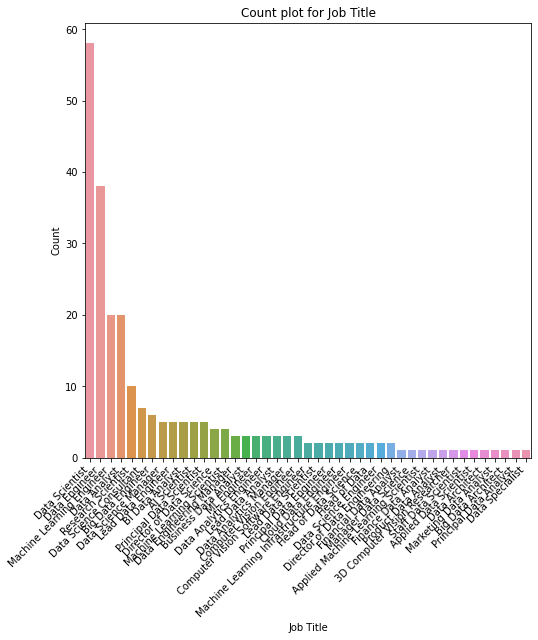

In [ ]:
# Visualisation des postes avant le cleaning
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
# Dans cette fonction on convertit d'abord les 'job roles' en miniscule et on les renomme
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

In [ ]:
# Application de la fonction title_cleaner()
df['Job Title']= df['job_title'].apply(title_cleaner)
df['Job Title'].value_counts()

data scientist    87
data engineer     58
data analyst      36
other             28
mle               22
manager            9
director           4
Name: Job Title, dtype: int64

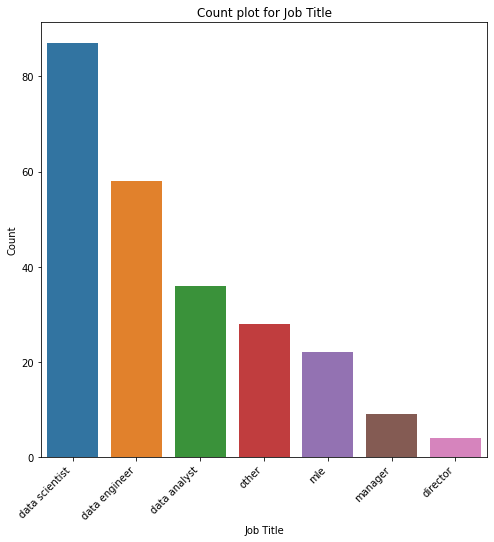

In [ ]:
# Visualisation après le cleaning
plt.figure(figsize=(8,8))
g = sns.countplot(x='Job Title', data=df, order = df['Job Title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


In [ ]:
# Analyse de la colonne 'experience_level'
df['experience_level'].value_counts()
#EN : Entry-level / Junior
#MI : Mid-level / Intermediate
#SE : Senior-level / Expert
#EX : Executive-level / Director

MI    102
SE     77
EN     54
EX     11
Name: experience_level, dtype: int64

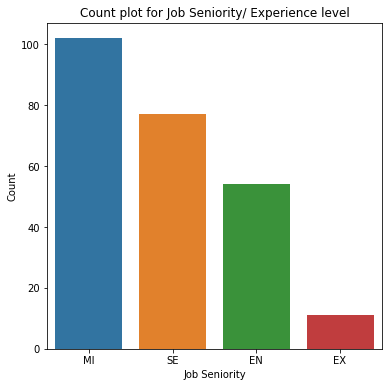

In [ ]:
# Visualisation 
plt.figure(figsize=(6,6))
g = sns.countplot(x='experience_level', data=df, order = df['experience_level'].value_counts().index)
p = plt.title('Count plot for Job Seniority/ Experience level')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

**Remarque :** On constate que la majorité des employés dans le dataset ont un niveau d'expérience intermédiaire

In [ ]:
# Analyse de la colonne 'employment_type'
df['employment_type'].value_counts()
#PT : Part-time
#FT : Full-time
#CT : Contract
#FL : Freelance

FT    230
PT      7
CT      4
FL      3
Name: employment_type, dtype: int64

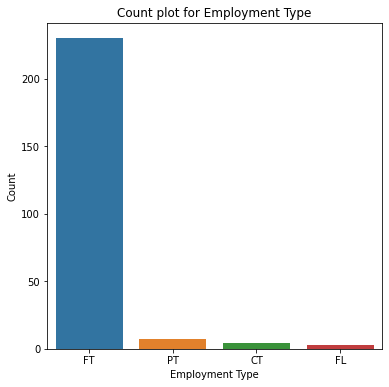

In [ ]:
# Visualisation
plt.figure(figsize=(6,6))
g = sns.countplot(x='employment_type', data=df, order = df['employment_type'].value_counts().index)
p = plt.title('Count plot for Employment Type')
p = plt.xlabel('Employment Type')
p = plt.ylabel('Count')

**Remarque:** la majorité des employés travaillent en 'Full-Time'

In [ ]:
df["salary_in_usd"].value_counts().unique

<bound method Series.unique of 150000    5
200000    4
110000    4
100000    4
90000     4
         ..
21695     1
42000     1
63971     1
260000    1
94917     1
Name: salary_in_usd, Length: 188, dtype: int64>

In [ ]:
# Analyse de la colonne 'employee_residence'
df["employee_residence"].value_counts()

US    92
IN    22
DE    18
FR    13
GB    13
CA     9
ES     7
JP     4
NL     4
GR     4
BR     4
PL     3
PT     3
TR     3
IT     3
PK     3
RU     3
MX     2
DK     2
RO     2
AT     2
NG     2
SG     2
HU     2
VN     2
LU     1
MD     1
SI     1
HK     1
CN     1
HR     1
BE     1
CL     1
KE     1
IR     1
NZ     1
CO     1
BG     1
RS     1
PR     1
JE     1
AE     1
UA     1
PH     1
MT     1
Name: employee_residence, dtype: int64

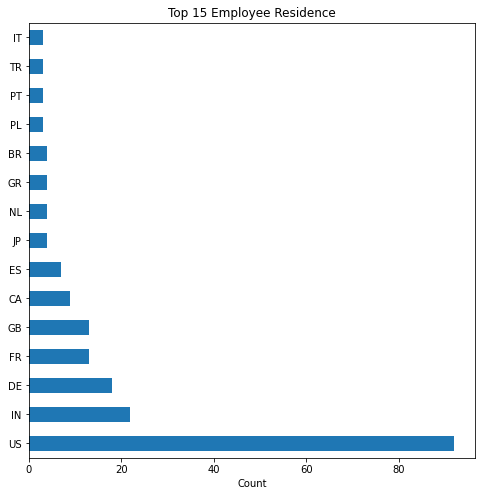

In [ ]:
# Visualisation
plt.figure(figsize=(8,8))
g = df["employee_residence"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Employee Residence')
p = plt.xlabel('Count')

In [ ]:
# Trimming the 'employee_residence' column

# On prend les 9 premiers pays et on remplace le reste par 'Others'
# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['employee_residence'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['employee_residence'] = df['employee_residence'].apply(job_location_simplifier)

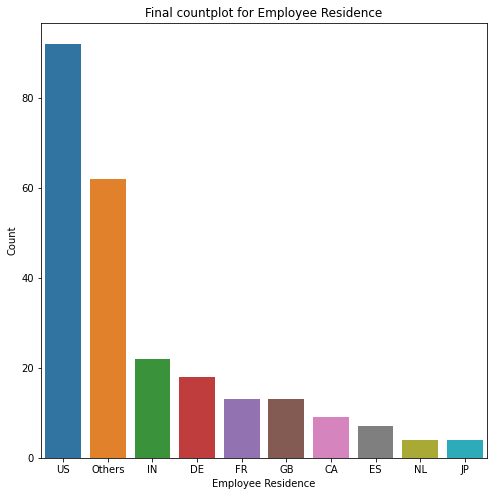

In [ ]:
# Visualisation after trimming
plt.figure(figsize=(8,8))
g = sns.countplot(x='employee_residence', data=df, order = df['employee_residence'].value_counts().index)
p = plt.title('Final countplot for Employee Residence')
p = plt.xlabel('Employee Residence')
p = plt.ylabel('Count')

In [ ]:
# Analyse de la colonne 'remote_ratio'
df["remote_ratio"].value_counts()
# 0 : No remote work (less than 20%)
# 50 : Partially remote
# 100 : Fully remote (more than 80%)

100    134
50      70
0       40
Name: remote_ratio, dtype: int64

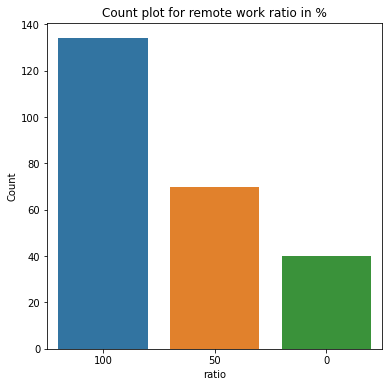

In [ ]:
# Visualisation
plt.figure(figsize=(6,6))
g = sns.countplot(x='remote_ratio', data=df, order = df['remote_ratio'].value_counts().index)
p = plt.title('Count plot for remote work ratio in %')
p = plt.xlabel('ratio')
p = plt.ylabel('Count')

In [ ]:
# Analyse de la colonne 'company_location'
# Vérifier et enlever s'il existe des ',' dans les localisations 
df['company_location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Le nombre total des localisations: {}'.format(len(df['company_location'].unique())))

Le nombre total des localisations: 41


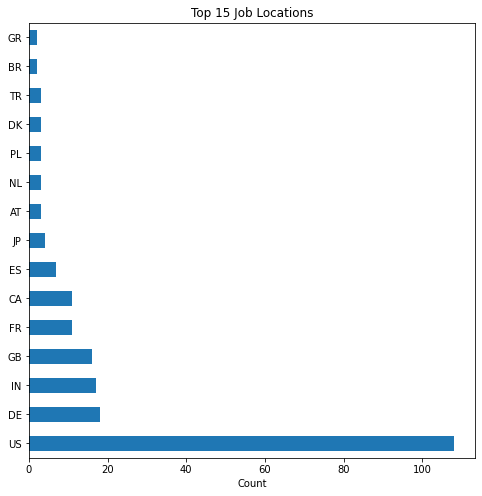

In [ ]:
# Visualisation
plt.figure(figsize=(8,8))
g = df["company_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

**• Trimming Columns** Features having more than 10 categories are trimmed so as to reduce the dimensionality
On va esssayer de réduire les catégories 


In [ ]:
# Trimming the 'company_location' column

# On prend les 9 premiers pays et on remplace le reste par 'Others'
# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['company_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['company_location'] = df['company_location'].apply(job_location_simplifier)

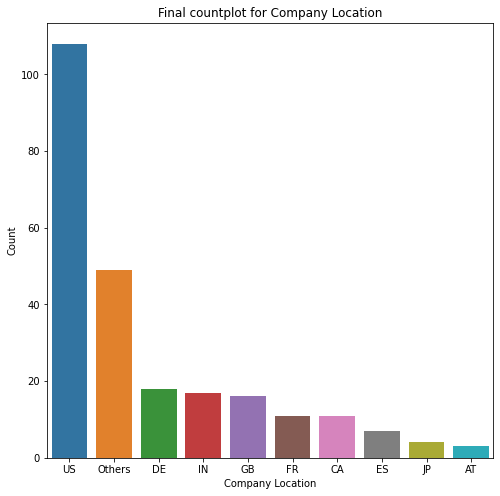

In [ ]:
# Visualisation after trimming
plt.figure(figsize=(8,8))
g = sns.countplot(x='company_location', data=df, order = df['company_location'].value_counts().index)
p = plt.title('Final countplot for Company Location')
p = plt.xlabel('Company Location')
p = plt.ylabel('Count')

In [ ]:
# Analyse de la colonne 'company_size'
df['company_size'].value_counts()

L    131
S     58
M     55
Name: company_size, dtype: int64

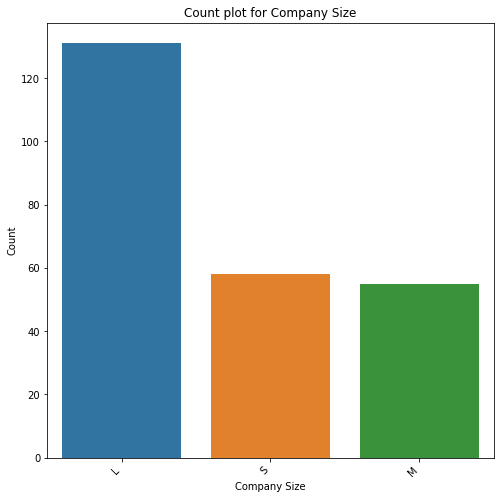

In [ ]:
# Visualisation
plt.figure(figsize=(8,8))
g = sns.countplot(x='company_size', data=df, order = df['company_size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


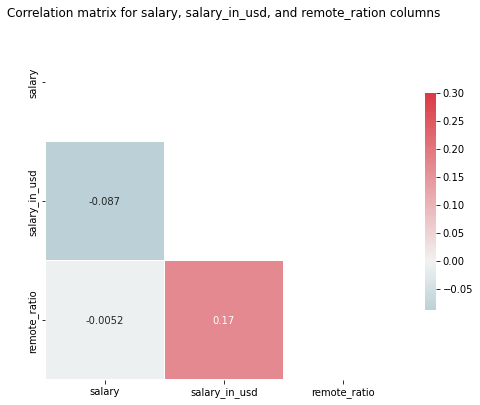

In [ ]:
# Finding and plotting the correlation between numerical features
#>>there are 3 numerical features
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['salary','salary_in_usd','remote_ratio']].corr() 

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for salary, salary_in_usd, and remote_ration columns')

remote_ratio affecte de 17% salary_in_usd, meme s'il s'agit d'une valeur positive **la corrélation** reste **faible**
Puisque les autres valeurs ne sont pas élevés , donc il n'y a pas de corrélation entre les valeurs numériques

In [ ]:
df.drop(labels=['salary','salary_currency'], axis=1, inplace=True)

• **Trimming Columns**
Features having more than 10 categories are trimmed so as to reduce the dimensionality.

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job Title
0,2021e,EN,FT,Data Science Consultant,64369,DE,50,DE,L,other
1,2020,SE,FT,Data Scientist,68428,Others,100,US,L,data scientist
2,2021e,EX,FT,Head of Data Science,85000,Others,0,Others,M,other
3,2021e,EX,FT,Head of Data,230000,Others,50,Others,L,other
4,2021e,EN,FT,Machine Learning Engineer,125000,US,100,US,S,mle
...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,US,100,US,L,data scientist
241,2021e,MI,FT,Principal Data Scientist,151000,US,100,US,L,data scientist
242,2020,EN,FT,Data Scientist,105000,US,100,US,S,data scientist
243,2020,EN,CT,Business Data Analyst,100000,US,100,US,L,data analyst


In [ ]:
X= df.drop(['salary_in_usd','work_year','job_title'],axis='columns')
y=df.salary_in_usd

print("Feature data dimension: ", X.shape)

Feature data dimension:  (244, 7)


In [ ]:
X

,experience_level,employment_type,employee_residence,remote_ratio,company_location,company_size,Job Title
0,EN,FT,DE,50,DE,L,other
1,SE,FT,Others,100,US,L,data scientist
2,EX,FT,Others,0,Others,M,other
3,EX,FT,Others,50,Others,L,other
4,EN,FT,US,100,US,S,mle
...,...,...,...,...,...,...,...
240,SE,FT,US,100,US,L,data scientist
241,MI,FT,US,100,US,L,data scientist
242,EN,FT,US,100,US,S,data scientist
243,EN,CT,US,100,US,L,data analyst


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
le__residence=LabelEncoder()
le_size=LabelEncoder()
le_experience = LabelEncoder()
le_type = LabelEncoder()
le_job = LabelEncoder()
le_location= LabelEncoder()

In [ ]:
X['residence'] = le_experience.fit_transform(X['employee_residence'])
X['size'] = le_experience.fit_transform(X['company_size'])
X['experience'] = le_experience.fit_transform(X['experience_level'])
X['type'] = le_type.fit_transform(X['employment_type'])
X['job'] = le_job.fit_transform(X['Job Title'])
X['location'] = le_location.fit_transform(X['company_location'])

In [ ]:
X = X.drop(['experience_level','employment_type','Job Title','company_location','employee_residence','company_size'],axis='columns')
X

,remote_ratio,residence,size,experience,type,job,location
0,50,1,0,0,2,6,2
1,100,8,0,3,2,2,9
2,0,8,1,1,2,6,8
3,50,8,0,1,2,6,8
4,100,9,2,0,2,5,9
...,...,...,...,...,...,...,...
240,100,9,0,3,2,2,9
241,100,9,0,2,2,2,9
242,100,9,2,0,2,2,9
243,100,9,0,0,0,0,9


In [ ]:
# Choix des features les plus importantes
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7f44b8a21c20>)

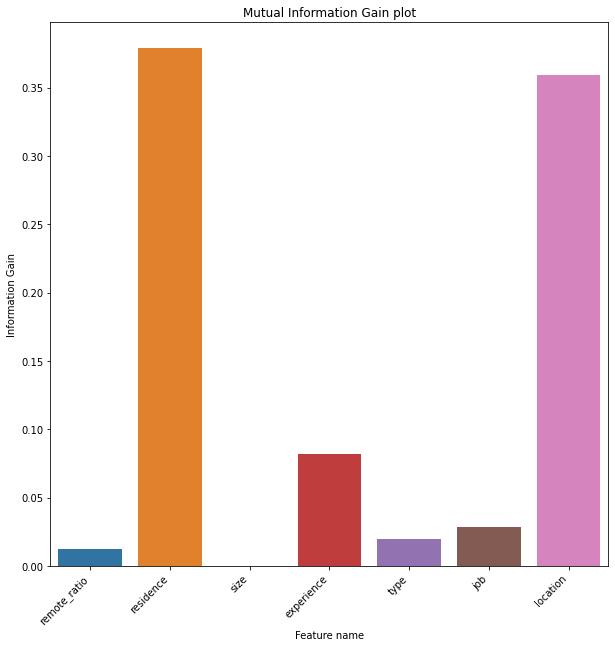

In [ ]:
# Visualisation
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

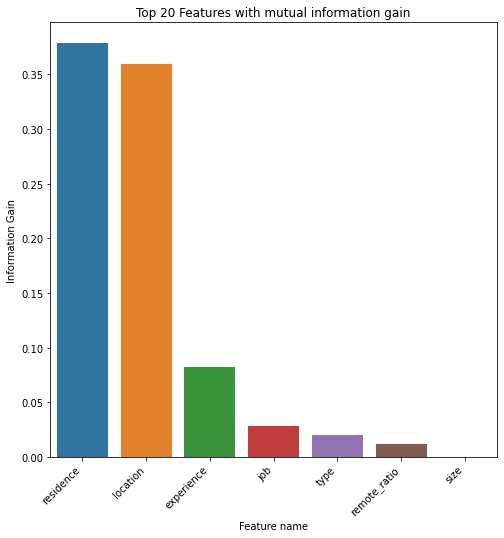

In [ ]:
# Visualisation
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

**Remarque :** On constate que les features : type, remote_ratio et size ne sont pas importants face aux autres features

In [ ]:
X = X.drop(['remote_ratio','size','type'],axis='columns')
X

,residence,experience,job,location
0,1,0,6,2
1,8,3,2,9
2,8,1,6,8
3,8,1,6,8
4,9,0,5,9
...,...,...,...,...
240,9,3,2,9
241,9,2,2,9
242,9,0,2,9
243,9,0,0,9


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -76399.324 ---
Standard Deviation: 23142.108


In [ ]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -76399.265 ---
Standard Deviation: 23142.137


In [ ]:
# Fitting KNeighbors Regression to the Training set
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
cv = cross_val_score(kn, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -69044.814 ---
Standard Deviation: 21185.074


In [ ]:
#Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -59606.962 ---
Standard Deviation: 20411.936


In [ ]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -60102.215 ---
Standard Deviation: 20307.999


In [ ]:
# Fitting Random Forest and Gradient Boosting to Voting Regressor
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('random_forest', rf), ('gradient_boosting', gb)], weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -58764.503 ---
Standard Deviation: 20558.533


Linear Regression : -76399.324

Lasso Regression : -76399.265

KNeighbors Regressor : -69044.814

Random Forest Regressor : -59606.962

Gradient Boosting Regressor : -60102.215

**Voting Regressor : -58764.503**

**Remarquons que** le model Voting Boosting a la plus faible valeur de RMSE (NRMSE en val absolue) qui représente la valeur standard de la déviation des erreurs quand une prédiction est faite. On conclut que Voting Regressor va bien fitter notre dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)
Test_X.reset_index(drop=True,inplace=True)
Train_Y.reset_index(drop=True,inplace=True)
Test_Y.reset_index(drop=True,inplace=True)

**Linear Regression**

In [ ]:
lr.fit(Train_X,Train_Y)

LinearRegression()

In [ ]:
lr.score(Test_X,Test_Y)

0.06192802421463339

**Lasso Regressor**

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(Train_X, Train_Y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(Test_X,Test_Y)

0.062137442762025374

**KNN Regressor**

In [ ]:
kn.fit(Train_X,Train_Y)

KNeighborsRegressor()

In [ ]:
kn.score(Train_X,Train_Y)

0.4744193989009008

**Random Forest Regressor**

In [ ]:
rf.fit(Train_X,Train_Y)

RandomForestRegressor()

In [ ]:
rf.score(Train_X,Train_Y)

0.625938658777641

**Gradient Boosting Regressor**

In [ ]:
gb.fit(Train_X,Train_Y)

GradientBoostingRegressor()

In [ ]:
gb.score(Train_X,Train_Y)

0.6141780564704236

**Voting Regressor** en utilisant random forest et gradient boosting

In [ ]:
vr.fit(Train_X,Train_Y)

VotingRegressor(estimators=[('random_forest', RandomForestRegressor()),
                            ('gradient_boosting', GradientBoostingRegressor())],
                weights=[2, 1])

In [ ]:
vr.score(Train_X,Train_Y)

0.6306227282341315